# Nonlocality Breaking Noise with Respect to the Mermin-Klyshko Inequality

In [1]:
import qnetvo as qnet
from context import utilities

from pennylane import numpy as np

import matplotlib.pyplot as plt

In [108]:
mk_dir = "../../script/data/mermin-klyshko-breaking_one-sided_amplitude_damping/"
mk_uni_dir = "../../script/data/mermin-klyshko-breaking_uniform_amplitude_damping/"

ghz_regex = lambda n: r"ghz_n-" + str(n) + r"_.*"
arb_regex = lambda n: r"arb_n-" + str(n) + r"_.*"

ghz_files = [
    utilities.get_data_files(mk_dir, ghz_regex(n))
    for n in [3,4,5]
]
arb_files = [
    utilities.get_data_files(mk_dir, arb_regex(n))
    for n in [3,4,5]
]

for i in range(3):
    print("\nn : ", i + 3)
    print("num ghz files : ", len(ghz_files[i]))
    print("num arb files : ", len(arb_files[i]))
    
ghz_uni_files = [
    utilities.get_data_files(mk_uni_dir, ghz_regex(n))
    for n in [3,4,5]
]
arb_uni_files = [
    utilities.get_data_files(mk_uni_dir, arb_regex(n))
    for n in [3,4,5]
]

for i in range(3):
    print("\nn : ", i + 3)
    print("num ghz uniform files : ", len(ghz_uni_files[i]))
    print("num arb uniform files : ", len(arb_uni_files[i]))


n :  3
num ghz files :  8
num arb files :  10

n :  4
num ghz files :  8
num arb files :  10

n :  5
num ghz files :  8
num arb files :  13

n :  3
num ghz uniform files :  14
num arb uniform files :  14

n :  4
num ghz uniform files :  14
num arb uniform files :  14

n :  5
num ghz uniform files :  13
num arb uniform files :  13


In [109]:
ghz_data = [
    utilities.analyze_data_one_param_scan(ghz_files[i])
    for i in range(3)
]
arb_data = [
    utilities.analyze_data_one_param_scan(arb_files[i])
    for i in range(3)
]

ghz_uni_data = [
    utilities.analyze_data_one_param_scan(ghz_uni_files[i])
    for i in range(3)
]
arb_uni_data = [
    utilities.analyze_data_one_param_scan(arb_uni_files[i])
    for i in range(3)
]

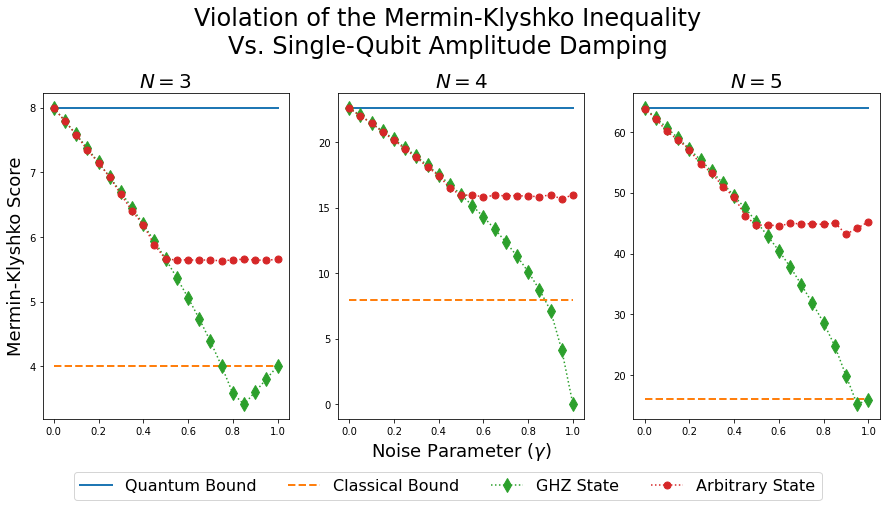

In [102]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))

axes = [ax1, ax2, ax3]

fig.suptitle("Violation of the Mermin-Klyshko Inequality\nVs. Single-Qubit Amplitude Damping\n", size=24, y=1.08)

for i, n in enumerate([3,4,5]):
    ax = axes[i]
    
    ax.plot(
        ghz_data[i]["noise_params"],
        [qnet.mermin_klyshko_quantum_bound(n)]*len(ghz_data[i]["noise_params"]),
        linewidth=2,
        label="Quantum Bound"
    )
    ax.plot(
        ghz_data[i]["noise_params"],
        [qnet.mermin_klyshko_classical_bound(n)]*len(ghz_data[i]["noise_params"]),
        "--",
        linewidth=2,
        label="Classical Bound"
    )
    
    ax.plot(
        ghz_data[i]["noise_params"],
        ghz_data[i]["max_scores"],
        ":d",
        label="GHZ State",
        markersize=10
    )
    
    ax.plot(
        arb_data[i]["noise_params"],
        arb_data[i]["max_scores"],
        ":.",
        label="Arbitrary State",
        markersize=14
    )
    
    ax.set_title(r"$N = $" + str(n), size=20)
    if i == 1:
        ax.set_xlabel(r"Noise Parameter ($\gamma$)", size=18)

    if i == 0:
        ax.set_ylabel("Mermin-Klyshko Score", size=18)
        fig.legend(ncol=4, loc="lower center", fontsize=16, bbox_to_anchor=(0.5, -0.08))
    
    
        

plt.show()

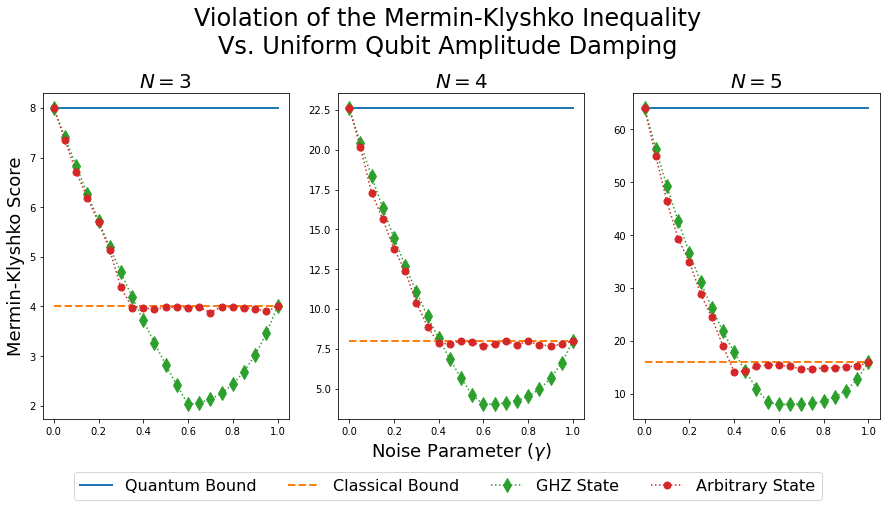

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))

axes = [ax1, ax2, ax3]

fig.suptitle("Violation of the Mermin-Klyshko Inequality\nVs. Uniform Qubit Amplitude Damping\n", size=24, y=1.08)

for i, n in enumerate([3,4,5]):
    ax = axes[i]
    
    ax.plot(
        ghz_uni_data[i]["noise_params"],
        [qnet.mermin_klyshko_quantum_bound(n)]*len(ghz_uni_data[i]["noise_params"]),
        linewidth=2,
        label="Quantum Bound"
    )
    ax.plot(
        ghz_uni_data[i]["noise_params"],
        [qnet.mermin_klyshko_classical_bound(n)]*len(ghz_uni_data[i]["noise_params"]),
        "--",
        linewidth=2,
        label="Classical Bound"
    )
    
    ax.plot(
        ghz_uni_data[i]["noise_params"],
        ghz_uni_data[i]["max_scores"],
        ":d",
        label="GHZ State",
        markersize=10
    )
    
    ax.plot(
        arb_uni_data[i]["noise_params"],
        arb_uni_data[i]["max_scores"],
        ":.",
        label="Arbitrary State",
        markersize=14
    )
    
    ax.set_title(r"$N = $" + str(n), size=20)
    if i == 1:
        ax.set_xlabel(r"Noise Parameter ($\gamma$)", size=18)

    if i == 0:
        ax.set_ylabel("Mermin-Klyshko Score", size=18)
        fig.legend(ncol=4, loc="lower center", fontsize=16, bbox_to_anchor=(0.5, -0.08))
    
plt.show()

(<Figure size 1296x216 with 1 Axes>, <Axes:>)


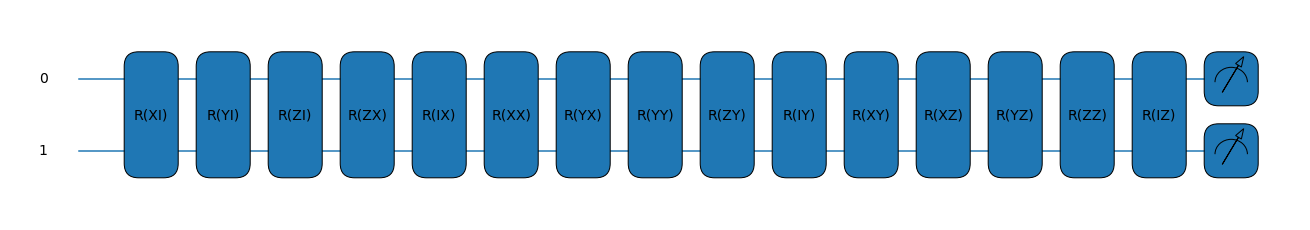

In [104]:
import pennylane as qml

dev = qml.device("default.qubit", wires=[0,1])

@qml.qnode(dev, diff_method="parameter-shift")
def test_qnode(settings):
    qml.ArbitraryUnitary(settings, wires=[0,1])
    
    return qml.probs(wires=[0,1])

print(qml.draw_mpl(test_qnode)([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]))

In [45]:
qml.ArbitraryStatePreparation(np.random.rand(6), wires=[0,1]).expand

<bound method ArbitraryStatePreparation.expand of ArbitraryStatePreparation(tensor([0.7836421 , 0.73528799, 0.14038358, 0.99621853, 0.56083102,
        0.53456322], requires_grad=True), wires=[0, 1])>